In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
with open("data_2.txt", "r") as f:
    data = f.read()

In [3]:
head_tail = [float(number) for number in data.strip().split("   ")][:1000]
head_tail = np.array(head_tail, dtype=np.int)-1
A_B = [float(number) for number in data.strip().split("   ")][1000:]
A_B = np.array(A_B, dtype=np.int)-1

In [4]:
np.unique(head_tail, return_counts=True)

(array([0, 1]), array([608, 392], dtype=int64))

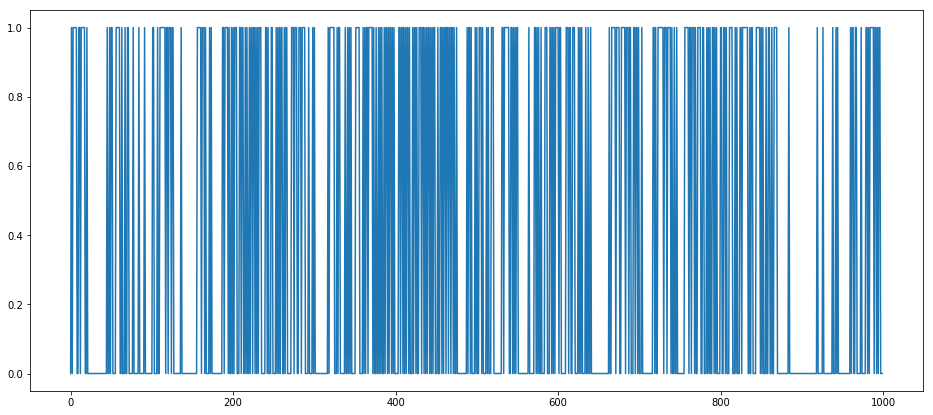

In [5]:
plt.figure(figsize=(16,7))
plt.plot(head_tail)
plt.show()

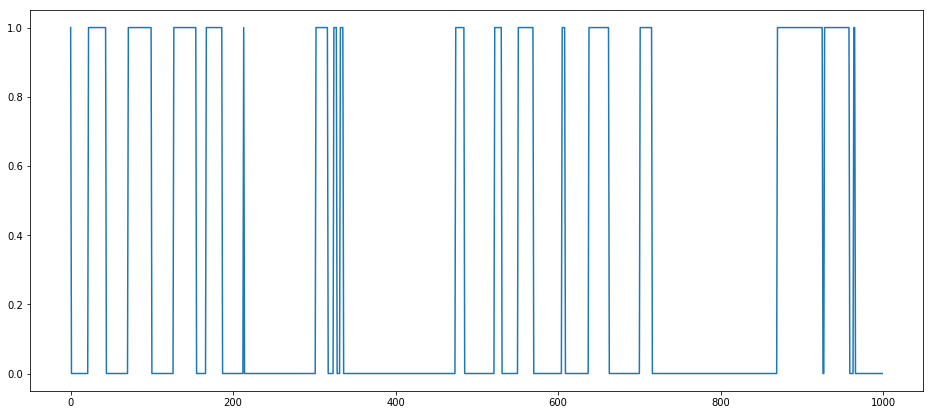

In [6]:
# poisson, geometric ,這次丟A，下一個會換B的機率是多少
plt.figure(figsize=(16,7))
plt.plot(A_B)
plt.show()

## solve the learning problem of HMM

In [7]:
from hmmlearn import hmm

In [8]:
# np.random.seed(42)
# trans_prior = np.array([0.9,0.1])
# start_prior = np.array([0.1,0.9])
model = hmm.MultinomialHMM(n_components=2,n_iter=1000,
                           transmat_prior=1, 
                           startprob_prior=1,tol=0.001
                          )

In [9]:
# model.transmat_ = np.array([[0.9, 0.1],
#                             [0.1, 0.9]])
# model.startprob_ = np.array([0.1,0.9])
model.fit(head_tail.reshape(1000,1)) # shape (n_samples, n_feature) => (1000,1)
print(model)
print(model.monitor_.converged)

print("emission:\n",model.emissionprob_)
print()
print("transition:\n", model.transmat_)
print()
print("start prob:\n", model.startprob_)

MultinomialHMM(algorithm='viterbi', init_params='ste', n_components=2,
        n_iter=1000, params='ste',
        random_state=<mtrand.RandomState object at 0x000001F1E0016240>,
        startprob_prior=1, tol=0.001, transmat_prior=1, verbose=False)
True
emission:
 [[ 0.94088436  0.05911564]
 [ 0.47260877  0.52739123]]

transition:
 [[ 0.93626664  0.06373336]
 [ 0.0263105   0.9736895 ]]

start prob:
 [  1.30499820e-08   9.99999987e-01]


In [10]:
_, predict_state_seq = model.decode(head_tail.reshape(1000,1))

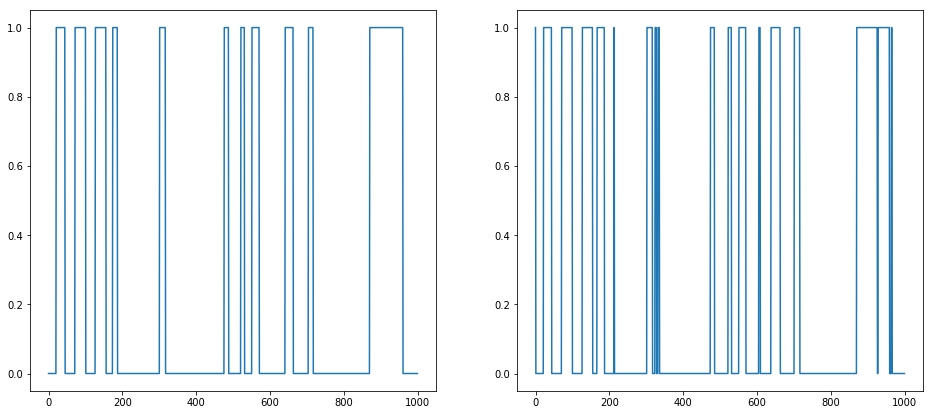

In [11]:
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
plt.plot(-predict_state_seq +1) # sometimes reverse the states

plt.subplot(1,2,2)
plt.plot(A_B)
plt.show()


Pa(head) = 0.95 <br>
Pb(head) = 0.45 <br>
transition_prob = 0.03